In [1]:
import xarray as xr
import numpy as np
fin = xr.open_dataset('emissions_idealized_edrivencdr_000101-031012_fv_0.9x1.25_cdk_20220218.nc')
areafin = xr.open_dataset('areacella_fx_CESM2_1pctCO2_r1i1p1f1_gn.nc')

/Users/cdkoven/miniconda2/envs/py3/lib/python3.7/site-packages/xarray/conventions.py:498: SerializationWarning: variable 'areacella' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,


In [2]:
def monthly_to_annual(array):
    """ calculate annual mena from monthly data, using unequal month lengths fros noleap calendar.  
    originally written by Keith Lindsay."""
    mon_day  = xr.DataArray(np.array([31.,28.,31.,30.,31.,30.,31.,31.,30.,31.,30.,31.]), dims=['month'])
    mon_wgt  = mon_day/mon_day.sum()
    return (array.rolling(time=12, center=False) # rolling
            .construct("month") # construct the array
            .isel(time=slice(11, None, 12)) # slice so that the first element is [1..12], second is [13..24]
            .dot(mon_wgt, dims=["month"]))

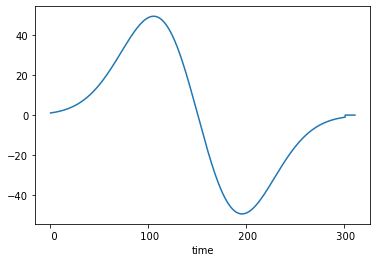

In [3]:
((fin['CO2_flux'][:].mean(dim='lat').mean(dim='lon') * areafin['areacella'][:].sum(dim='lat').sum(dim='lon'))*86400.*365. * 1.e-12).plot()


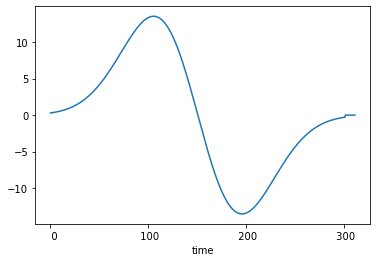

In [4]:
## also show in Pg C not in GT CO2

((fin['CO2_flux'][:].mean(dim='lat').mean(dim='lon') * areafin['areacella'][:].sum(dim='lat').sum(dim='lon'))*86400.*365. * 1.e-12 * 12.01/44.01).plot()



In [5]:
mapfile = xr.open_dataset('areacella_fx_CESM2_1pctCO2_r1i1p1f1_gn.nc')
areas = mapfile['areacella'].sum()
global_gridcell_integrated_area = float(areas.data)
global_gridcell_integrated_area

/Users/cdkoven/miniconda2/envs/py3/lib/python3.7/site-packages/xarray/conventions.py:498: SerializationWarning: variable 'areacella' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,


510099676200960.0

In [6]:
import math as m
radius = 6371 # km
4. * m.pi * (radius * 1e3) **2

510064471909788.25

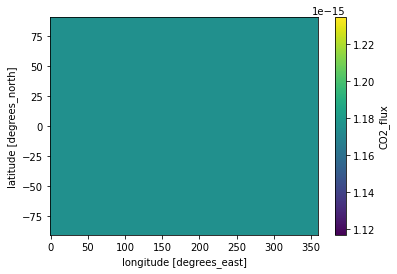

In [7]:
fin['CO2_flux'].mean(dim='time').plot()

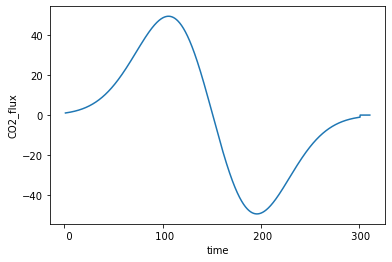

In [8]:
(fin['CO2_flux'].mean(dim='lat').mean(dim='lon') * 86400 * 365. * global_gridcell_integrated_area * 1e-12).plot()


In [9]:
areafin['areacella'][:].sum()

<xarray.DataArray 'areacella' ()>
array(5.1009968e+14, dtype=float32)

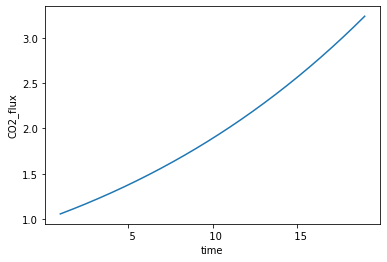

In [10]:
(fin['CO2_flux'].mean(dim='lat').mean(dim='lon') * 86400 * 365. * global_gridcell_integrated_area * 1e-12)[0:216].plot()



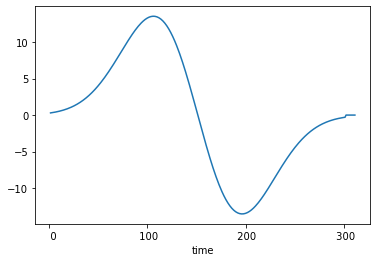

In [11]:
## show cumulative in Pg C not in GT CO2

co2flux = ((fin['CO2_flux'][:].mean(dim='lat').mean(dim='lon') * areafin['areacella'][:].sum(dim='lat').sum(dim='lon'))*86400.*365. * 1.e-12 * 12.01/44.01)

co2flux_annual= monthly_to_annual(co2flux)

co2flux_annual.plot()

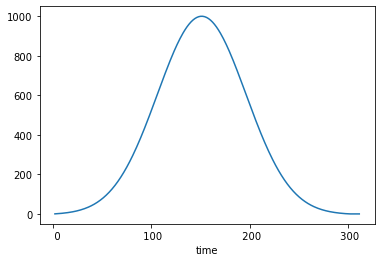

In [12]:
co2flux_annual.cumsum().plot()

In [13]:
fin['CO2_flux']

<xarray.DataArray 'CO2_flux' (time: 3720, lat: 192, lon: 288)>
array([[[6.567535e-11, 6.567535e-11, ..., 6.567535e-11, 6.567535e-11],
        [6.567535e-11, 6.567535e-11, ..., 6.567535e-11, 6.567535e-11],
        ...,
        [6.567535e-11, 6.567535e-11, ..., 6.567535e-11, 6.567535e-11],
        [6.567535e-11, 6.567535e-11, ..., 6.567535e-11, 6.567535e-11]],

       [[6.603999e-11, 6.603999e-11, ..., 6.603999e-11, 6.603999e-11],
        [6.603999e-11, 6.603999e-11, ..., 6.603999e-11, 6.603999e-11],
        ...,
        [6.603999e-11, 6.603999e-11, ..., 6.603999e-11, 6.603999e-11],
        [6.603999e-11, 6.603999e-11, ..., 6.603999e-11, 6.603999e-11]],

       ...,

       [[0.000000e+00, 0.000000e+00, ..., 0.000000e+00, 0.000000e+00],
        [0.000000e+00, 0.000000e+00, ..., 0.000000e+00, 0.000000e+00],
        ...,
        [0.000000e+00, 0.000000e+00, ..., 0.000000e+00, 0.000000e+00],
        [0.000000e+00, 0.000000e+00, ..., 0.000000e+00, 0.000000e+00]],

       [[0.000000e+00, 0.000000e+00, ..., 0.000000e+00, 0.000000e+00],
        [0.000000e+00, 0.000000e+00, ..., 0.000000e+00, 0.000000e+00],
        ...,
        [0.000000e+00, 0.000000e+00, ..., 0.000000e+00, 0.000000e+00],
        [0.000000e+00, 0.000000e+00, ..., 0.000000e+00, 0.000000e+00]]],
      dtype=float32)
Coordinates:
  * time     (time) object 0001-01-16 00:00:00 ... 0310-12-16 00:00:00
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Attributes:
    cell_methods:  time: mean
    long_name:     CO2 Anthropogenic Emissions
    units:         kg m-2 s-1